In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

## 데이터 불러오기

In [15]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

In [16]:
# 훈련 데이터 배열 확인
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [17]:
# 테스트 데이터 배열 확인
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


In [18]:
# 훈련 데이터 정규화 및 1차원 배열로 변경
train_scaled = train_input / 255
train_scaled = train_scaled.reshape(-1, 784)

print(train_scaled.shape)

(60000, 784)


In [19]:
# 훈련 데이터와 검증 데이터 분류
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, \
                                                                    test_size=0.2 ,random_state=42)


In [20]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [21]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


In [22]:
# 밀집층 생성
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))

In [23]:
# 모델 구축
model = keras.Sequential(dense)

In [24]:
# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [25]:
# 모델 훈련
hist = model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
  11/1500 [..............................] - ETA: 7s - loss: 1.9715 - accuracy: 0.3438      

2023-03-02 22:27:10.167841: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - 7s 4ms/step - loss: 0.6067 - accuracy: 0.7966
Epoch 2/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4785 - accuracy: 0.8395
Epoch 3/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4568 - accuracy: 0.8475
Epoch 4/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4441 - accuracy: 0.8525
Epoch 5/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4371 - accuracy: 0.8546


In [30]:
# 검증 데이터로 모델 성능확인
val_hist = model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.4469 - accuracy: 0.8493


In [29]:
hist.history.keys()

dict_keys(['loss', 'accuracy'])

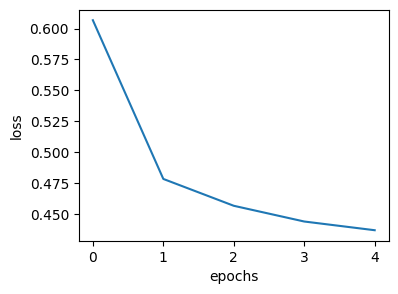

In [35]:
# loss 시각화
plt.figure(figsize=(4,3))
plt.plot(hist.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

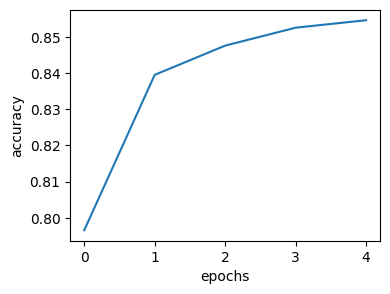

In [36]:
# accuracy 시각화
plt.figure(figsize=(4,3))
plt.plot(hist.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()